## Final Project Submission

In [3]:
from bs4 import BeautifulSoup
import requests as rq
import pandas as pd
import numpy as np

In [20]:
dataframes =[]
for i in range(2000,2020):
    url = 'https://www.boxofficemojo.com/year/world/{}/'.format(i)
    r = rq.get(url)
    p = BeautifulSoup(r.text, 'html.parser')
    movie_titles = p.find_all('a', class_='a-link-normal')
    titles = []
    for movie in movie_titles:
        titles.append(movie.text)
    domestic_titles=titles[17:-11]
#     dom_titles = []
#     dom_titles.append(domestic_titles)
    titles_df = pd.DataFrame(dom_titles)
    movie_gross = p.find_all('td', class_='a-text-right mojo-field-type-money')
    worldwide_gross = []
    for movie in movie_gross:
        worldwide_gross.append(movie.text)
    domestic_gross = worldwide_gross[1::3]
    dom_gross_df = pd.DataFrame(domestic_gross)
    dom_gross_df['Year']=i
    tables = [titles_df.T, dom_gross_df]
    result = pd.concat(tables, axis=1)
    dataframes.append(result)

In [21]:
dataframes

[                                        0             0  Year
 0                  Mission: Impossible II  $215,409,889  2000
 1                               Gladiator  $187,705,427  2000
 2                               Cast Away  $233,632,142  2000
 3                         What Women Want  $182,811,707  2000
 4                                Dinosaur  $137,748,063  2000
 ..                                    ...           ...   ...
 372                    Stella Does Tricks        $4,224  2000
 373              Blood, Friends and Money        $3,930  2000
 374  The Boys in the Band 2000 Re-release        $2,695  2000
 375                         Better Living        $2,147  2000
 376                                  Pups        $1,590  2000
 
 [377 rows x 3 columns],
                                                      0             0  Year
 0                Harry Potter and the Sorcerer's Stone  $317,575,550  2001
 1    The Lord of the Rings: The Fellowship of the Ring  $313,364

In [22]:
df=pd.concat(dataframes)

In [23]:
df.columns = ['Title', 'Domestic Gross', 'Year']

In [72]:
df.reset_index

0      2000
1      2000
2      2000
3      2000
4      2000
       ... 
674    2000
675    2000
676    2000
677    2000
678    2000
Name: Year, Length: 12505, dtype: int64

In [24]:
df

,Title,Domestic Gross,Year
0,Mission: Impossible II,"$215,409,889",2000
1,Gladiator,"$187,705,427",2000
2,Cast Away,"$233,632,142",2000
3,What Women Want,"$182,811,707",2000
4,Dinosaur,"$137,748,063",2000
...,...,...,...
674,Jimi Hendrix Electric Church,-,2019
675,Game Day,"$1,624",2019
676,The Hours and Times,"$1,273",2019
677,The Untold Story,$790,2019


In [27]:
df.reset_index(drop=True, inplace=True)

In [34]:
df.rename(columns={'Title':'title'}, inplace=True)

In [35]:
df

,title,Domestic Gross,Year
0,Mission: Impossible II,"$215,409,889",2000
1,Gladiator,"$187,705,427",2000
2,Cast Away,"$233,632,142",2000
3,What Women Want,"$182,811,707",2000
4,Dinosaur,"$137,748,063",2000
...,...,...,...
12500,Jimi Hendrix Electric Church,-,2019
12501,Game Day,"$1,624",2019
12502,The Hours and Times,"$1,273",2019
12503,The Untold Story,$790,2019


In [32]:
bech_df = pd.read_csv('module1mediaproject_export_dataframe.csv')

In [33]:
bech_df

,title,year,rating,id,imdbid
0,1917,2019,0,8962,8579674
1,A Beautiful Day in the Neighborhood,2019,0,8911,3224458
2,A Dog&#39;s Journey,2019,1,8946,8385474
3,Abominable,2019,0,8889,6324278
4,Ad Astra,2019,0,8855,2935510
...,...,...,...,...,...
5199,Where the Heart Is,2000,1,882,198021
5200,"Whole Nine Yards, The",2000,1,131,190138
5201,"Wo hu cang long (Crouching Tiger, Hidden Dragon)",2000,1,855,190332
5202,Wonder Boys,2000,0,8782,185014


In [36]:
bech_gross_df = df.merge(bech_df, on="title", how = 'inner')

In [37]:
bech_gross_df

,title,Domestic Gross,Year,year,rating,id,imdbid
0,Mission: Impossible II,"$215,409,889",2000,2000,0,5605,120755
1,Gladiator,"$187,705,427",2000,2000,0,1163,172495
2,Cast Away,"$233,632,142",2000,2000,0,3795,162222
3,What Women Want,"$182,811,707",2000,2000,0,1083,207201
4,What Women Want,"$123,526",2011,2000,0,1083,207201
...,...,...,...,...,...,...,...
2525,Her Smell,"$255,599",2019,2019,1,8940,7942742
2526,American Woman,"$236,637",2019,2019,1,8647,9109492
2527,Little Joe,"$23,862",2019,2019,1,8967,9204204
2528,Rafiki,"$137,968",2019,2018,1,8596,8286894


In [38]:
bech_gross_df.nunique()

title             2409
Domestic Gross    2452
Year                20
year                20
rating               2
id                2441
imdbid            2439
dtype: int64

In [51]:
bech_gross_df['title'].nunique()

2409

In [50]:
bech_gross_df.drop_duplicates(subset=['title'], keep='first', inplace=True)

In [41]:
bech_gross_df['title'].isna().sum()

0

In [46]:
empty = 0
for movie in bech_gross_df['Domestic Gross']:
    if movie == '-':
        empty+=1
empty

36

In [52]:
df_clean1 = bech_gross_df[bech_gross_df['Domestic Gross'] != '-']

In [53]:
df_clean1

,title,Domestic Gross,Year,year,rating,id,imdbid
0,Mission: Impossible II,"$215,409,889",2000,2000,0,5605,120755
1,Gladiator,"$187,705,427",2000,2000,0,1163,172495
2,Cast Away,"$233,632,142",2000,2000,0,3795,162222
3,What Women Want,"$182,811,707",2000,2000,0,1083,207201
5,Dinosaur,"$137,748,063",2000,2000,1,7188,130623
...,...,...,...,...,...,...,...
2524,Sword of Trust,"$322,421",2019,2019,1,8805,8484012
2525,Her Smell,"$255,599",2019,2019,1,8940,7942742
2526,American Woman,"$236,637",2019,2019,1,8647,9109492
2527,Little Joe,"$23,862",2019,2019,1,8967,9204204


In [54]:
df_clean1.reset_index(drop=True,inplace=True)

In [55]:
df_clean1

,title,Domestic Gross,Year,year,rating,id,imdbid
0,Mission: Impossible II,"$215,409,889",2000,2000,0,5605,120755
1,Gladiator,"$187,705,427",2000,2000,0,1163,172495
2,Cast Away,"$233,632,142",2000,2000,0,3795,162222
3,What Women Want,"$182,811,707",2000,2000,0,1083,207201
4,Dinosaur,"$137,748,063",2000,2000,1,7188,130623
...,...,...,...,...,...,...,...
2369,Sword of Trust,"$322,421",2019,2019,1,8805,8484012
2370,Her Smell,"$255,599",2019,2019,1,8940,7942742
2371,American Woman,"$236,637",2019,2019,1,8647,9109492
2372,Little Joe,"$23,862",2019,2019,1,8967,9204204


In [56]:
del df_clean1['year']

In [57]:
df_clean1

,title,Domestic Gross,Year,rating,id,imdbid
0,Mission: Impossible II,"$215,409,889",2000,0,5605,120755
1,Gladiator,"$187,705,427",2000,0,1163,172495
2,Cast Away,"$233,632,142",2000,0,3795,162222
3,What Women Want,"$182,811,707",2000,0,1083,207201
4,Dinosaur,"$137,748,063",2000,1,7188,130623
...,...,...,...,...,...,...
2369,Sword of Trust,"$322,421",2019,1,8805,8484012
2370,Her Smell,"$255,599",2019,1,8940,7942742
2371,American Woman,"$236,637",2019,1,8647,9109492
2372,Little Joe,"$23,862",2019,1,8967,9204204


In [68]:
df_clean1['rating'].describe()

count    2374.000000
mean        0.593934
std         0.491201
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: rating, dtype: float64

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df_clean1.to_csv('df_clean1_to_csv.csv')

In [95]:
df_clean1['Domestic Gross'] = df_clean1['Domestic Gross'].map(lambda x: x.lstrip('$').replace(',',''))

/Users/brendonius/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
df_clean1['Domestic Gross']= pd.to_numeric(df_clean1['Domestic Gross'])

/Users/brendonius/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
df_clean1

,title,Domestic Gross,Year,rating,id,imdbid
0,Mission: Impossible II,215409889,2000,0,5605,120755
1,Gladiator,187705427,2000,0,1163,172495
2,Cast Away,233632142,2000,0,3795,162222
3,What Women Want,182811707,2000,0,1083,207201
4,Dinosaur,137748063,2000,1,7188,130623
...,...,...,...,...,...,...
2369,Sword of Trust,322421,2019,1,8805,8484012
2370,Her Smell,255599,2019,1,8940,7942742
2371,American Woman,236637,2019,1,8647,9109492
2372,Little Joe,23862,2019,1,8967,9204204


In [105]:
movie_pass=df_clean1[df_clean1['rating']==1]

In [106]:
movie_pass.median

,title,Domestic Gross,Year,rating,id,imdbid
4,Dinosaur,137748063,2000,1,7188,130623
5,How the Grinch Stole Christmas,260044825,2000,1,7928,170016
8,What Lies Beneath,155464351,2000,1,1071,161081
9,Scary Movie,157019771,2000,1,5544,175142
10,Erin Brockovich,125595205,2000,1,452,195685
...,...,...,...,...,...,...
2369,Sword of Trust,322421,2019,1,8805,8484012
2370,Her Smell,255599,2019,1,8940,7942742
2371,American Woman,236637,2019,1,8647,9109492
2372,Little Joe,23862,2019,1,8967,9204204


In [107]:
movie_pass['Domestic Gross'].describe()

count    1.410000e+03
mean     4.747980e+07
std      8.474295e+07
min      3.830000e+02
25%      6.110460e+05
50%      1.419602e+07
75%      5.639969e+07
max      8.583730e+08
Name: Domestic Gross, dtype: float64

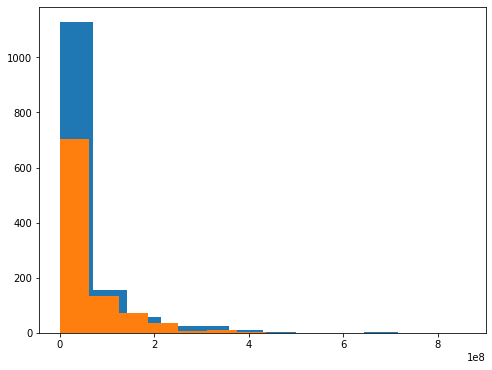

In [124]:
x1 = movie_pass['Domestic Gross']
x2 = movie_nopass['Domestic Gross']

fig = plt.figure(figsize=(8,6))

plt.hist(x1, bins=12)
plt.hist(x2, bins=12)
plt.show()

In [108]:
movie_nopass=df_clean1[df_clean1['rating']==0]

In [110]:
movie_nopass['Domestic Gross'].describe()

count    9.640000e+02
mean     4.954410e+07
std      7.118637e+07
min      1.810000e+03
25%      1.117783e+06
50%      2.275889e+07
75%      6.723078e+07
max      7.497661e+08
Name: Domestic Gross, dtype: float64

In [142]:
y2=movie_pass.groupby('Year')['Domestic Gross'].mean()

In [144]:
y2.reset_index(drop=True, inplace=True)

In [145]:
y2

0     6.411823e+07
1     3.232767e+07
2     4.521641e+07
3     4.006201e+07
4     4.045108e+07
5     3.682599e+07
6     3.282521e+07
7     4.400166e+07
8     3.821812e+07
9     4.066419e+07
10    5.005714e+07
11    3.873339e+07
12    3.114154e+07
13    3.975002e+07
14    4.071165e+07
15    5.809345e+07
16    5.420238e+07
17    7.150391e+07
18    8.579211e+07
19    8.968512e+07
Name: Domestic Gross, dtype: float64

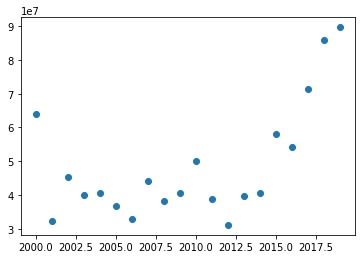

In [152]:
plt.scatter(movie_pass['Year'].unique(), y2)

In [155]:
y3=movie_nopass.groupby('Year')['Domestic Gross'].mean()
y3.reset_index(drop=True, inplace=True)

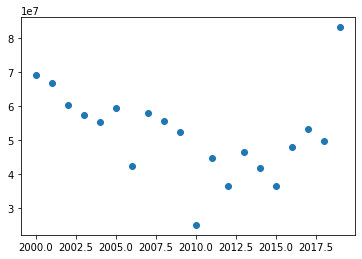

In [153]:
plt.scatter(movie_pass['Year'].unique(), y3)

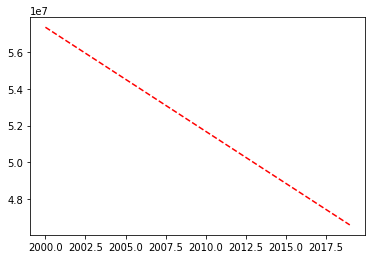

In [160]:
x=movie_pass['Year'].unique()
z = np.polyfit(x, y3, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

In [157]:
x

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [158]:
y3

0     6.898215e+07
1     6.680268e+07
2     6.013080e+07
3     5.723565e+07
4     5.510745e+07
5     5.936378e+07
6     4.223785e+07
7     5.774594e+07
8     5.551894e+07
9     5.235837e+07
10    2.493870e+07
11    4.452040e+07
12    3.642323e+07
13    4.646584e+07
14    4.173881e+07
15    3.649838e+07
16    4.773941e+07
17    5.303673e+07
18    4.954606e+07
19    8.309932e+07
Name: Domestic Gross, dtype: float64